# Traffic Light Detection

## Imports

In [1]:
import numpy as np
import os
import sys
import tensorflow as tf
import time

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
%matplotlib inline

/Users/sundar/anaconda3/envs/deep-learning/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

In [5]:
sim_model_path = 'model_frozen_sim/frozen_inference_graph.pb'
real_model_path = 'model_frozen_real/frozen_inference_graph.pb'
labels_path = 'model/label_map.pbtxt'
image_size = (12, 8)

In [6]:
label_map = label_map_util.load_labelmap(labels_path)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=4, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)

{1: {'id': 1, 'name': 'Red'}, 2: {'id': 2, 'name': 'Yellow'}, 3: {'id': 3, 'name': 'Green'}, 4: {'id': 4, 'name': 'off'}}


In [7]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [8]:
from glob import glob

## Functions

In [9]:
def import_graph(model_path):
    detection_graph = tf.Graph()
    
    with detection_graph.as_default():
      od_graph_def = tf.GraphDef()
    
      with tf.gfile.GFile(model_path, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')
        
    return detection_graph
        
    
def load_test_images(directory):
    print(os.path.join(directory, '*.jpg'))
    image_paths = glob(os.path.join(directory, '*.jpg'))
    print("Length of test images:", len(image_paths))
    return image_paths

In [10]:
def predict(detection_graph, image_paths):
    with detection_graph.as_default():
        with tf.Session(graph=detection_graph) as sess:
            # Definite input and output Tensors for detection_graph
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

            # Each box represents a part of the image where a particular object was detected.
            detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

            # Each score represent how level of confidence for each of the objects.
            # Score is shown on the result image, together with the class label.
            detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
            detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
            num_detections = detection_graph.get_tensor_by_name('num_detections:0')
            for image_path in image_paths:
                image = Image.open(image_path)
                # the array based representation of the image will be used later in order to prepare the
                # result image with boxes and labels on it.
                image_np = load_image_into_numpy_array(image)
                # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
                image_np_expanded = np.expand_dims(image_np, axis=0)

                time0 = time.time()

                # Actual detection.
                (boxes, scores, classes, num) = sess.run(
                  [detection_boxes, detection_scores, detection_classes, num_detections],
                  feed_dict={image_tensor: image_np_expanded})

                time1 = time.time()

                boxes = np.squeeze(boxes)
                scores = np.squeeze(scores)
                classes = np.squeeze(classes).astype(np.int32)

                # Visualization of the results of a detection.
                vis_util.visualize_boxes_and_labels_on_image_array(
                    image_np, boxes, classes, scores,
                    category_index,
                    use_normalized_coordinates=True,
                    line_thickness=6)

                plt.figure(figsize=image_size)
                plt.imshow(image_np)
                plt.show()

                min_score_thresh = .50
                for i in range(boxes.shape[0]):
                    if scores is None or scores[i] > min_score_thresh:

                        class_name = category_index[classes[i]]['name']
                        print('{}'.format(class_name), scores[i])

                        fx =  0.97428
                        fy =  1.73205
                        perceived_width_x = (boxes[i][3] - boxes[i][1]) * 800
                        perceived_width_y = (boxes[i][2] - boxes[i][0]) * 600

                        # ymin, xmin, ymax, xmax = box
                        # depth_prime = (width_real * focal) / perceived_width
                        perceived_depth_x = ((.1 * fx) / perceived_width_x)
                        perceived_depth_y = ((.3 * fy) / perceived_width_y )

                        estimated_distance = round((perceived_depth_x + perceived_depth_y) / 2)
                        print("Distance (metres)", estimated_distance)
                        print("Time in milliseconds", (time1 - time0) * 1000, "\n")

## Detection: Simulator Test Pictures

test_images_sim/*.jpg
Length of test images: 12


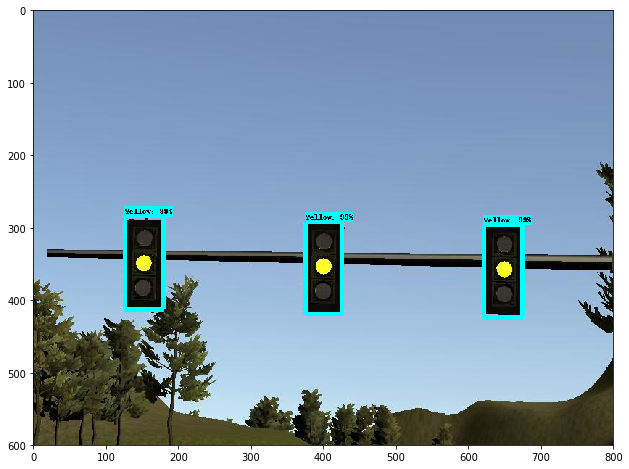

Yellow 0.9998311
Distance (metres) 0.0
Time in milliseconds 1281.482219696045 

Yellow 0.99976665
Distance (metres) 0.0
Time in milliseconds 1281.482219696045 

Yellow 0.9987078
Distance (metres) 0.0
Time in milliseconds 1281.482219696045 



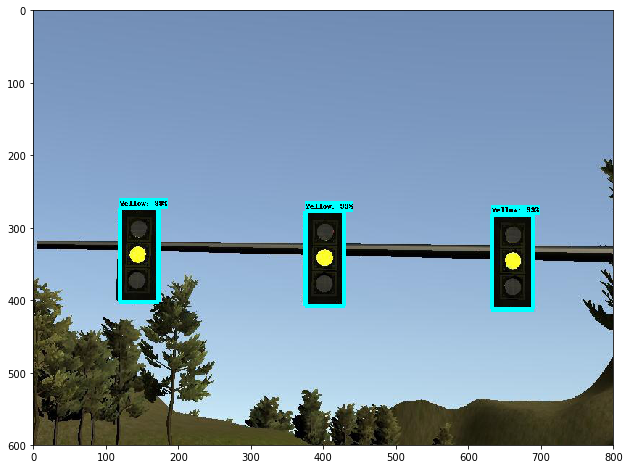

Yellow 0.9997003
Distance (metres) 0.0
Time in milliseconds 87.24403381347656 

Yellow 0.9993337
Distance (metres) 0.0
Time in milliseconds 87.24403381347656 

Yellow 0.9945945
Distance (metres) 0.0
Time in milliseconds 87.24403381347656 



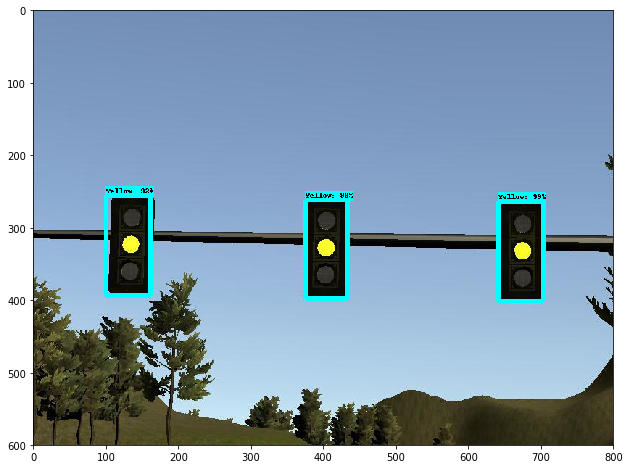

Yellow 0.998955
Distance (metres) 0.0
Time in milliseconds 91.95685386657715 

Yellow 0.9933397
Distance (metres) 0.0
Time in milliseconds 91.95685386657715 

Yellow 0.9259874
Distance (metres) 0.0
Time in milliseconds 91.95685386657715 



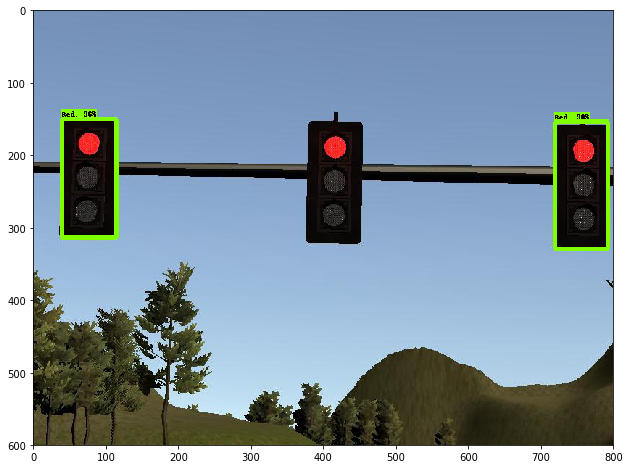

Red 0.9855284
Distance (metres) 0.0
Time in milliseconds 87.0511531829834 

Red 0.9659086
Distance (metres) 0.0
Time in milliseconds 87.0511531829834 



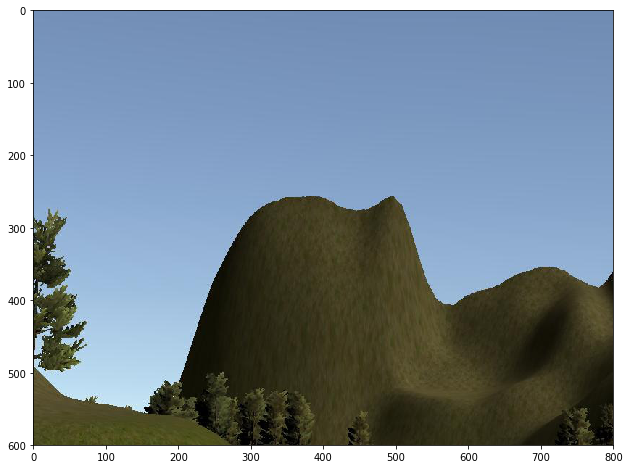

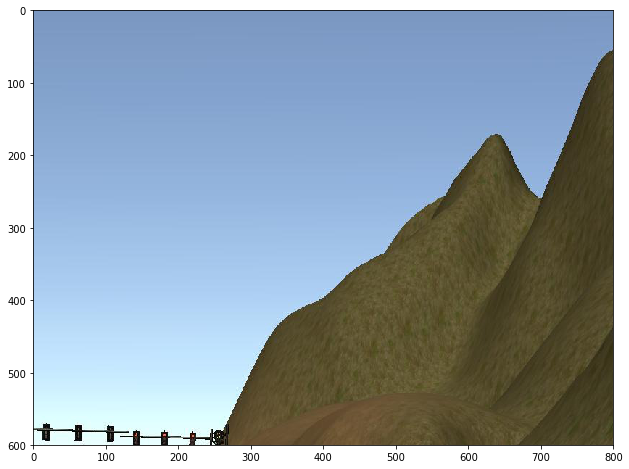

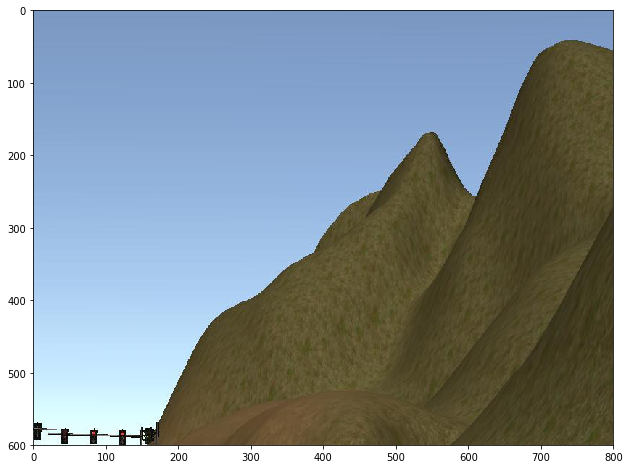

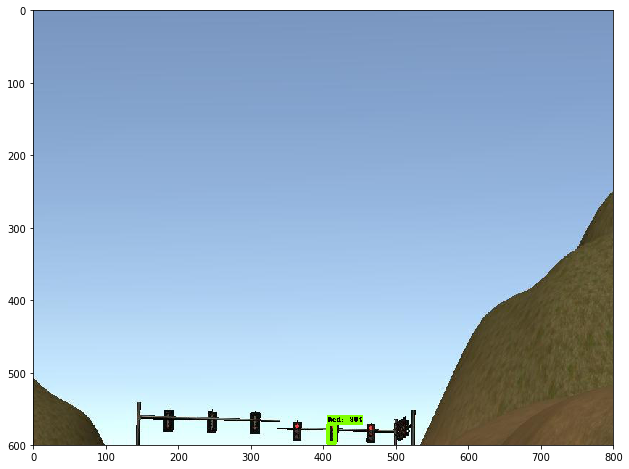

Red 0.905068
Distance (metres) 0.0
Time in milliseconds 92.85879135131836 



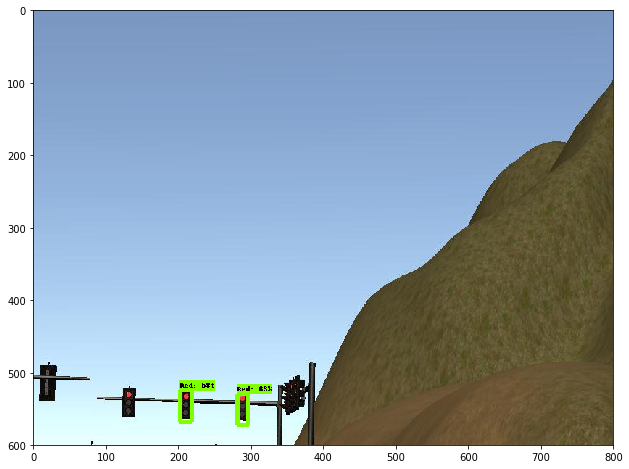

Red 0.6322709
Distance (metres) 0.0
Time in milliseconds 99.81584548950195 

Red 0.5839813
Distance (metres) 0.0
Time in milliseconds 99.81584548950195 



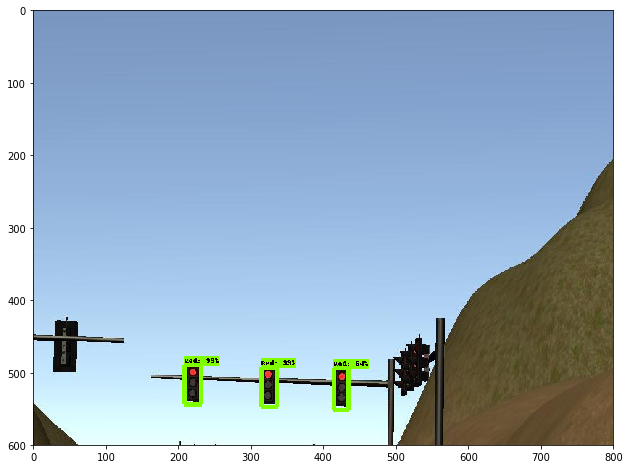

Red 0.994921
Distance (metres) 0.0
Time in milliseconds 111.06324195861816 

Red 0.9942245
Distance (metres) 0.0
Time in milliseconds 111.06324195861816 

Red 0.641381
Distance (metres) 0.0
Time in milliseconds 111.06324195861816 



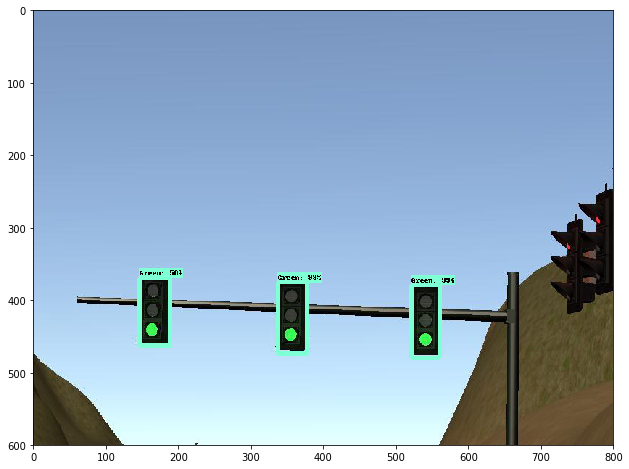

Green 0.99957365
Distance (metres) 0.0
Time in milliseconds 88.48214149475098 

Green 0.99535143
Distance (metres) 0.0
Time in milliseconds 88.48214149475098 

Green 0.5047413
Distance (metres) 0.0
Time in milliseconds 88.48214149475098 



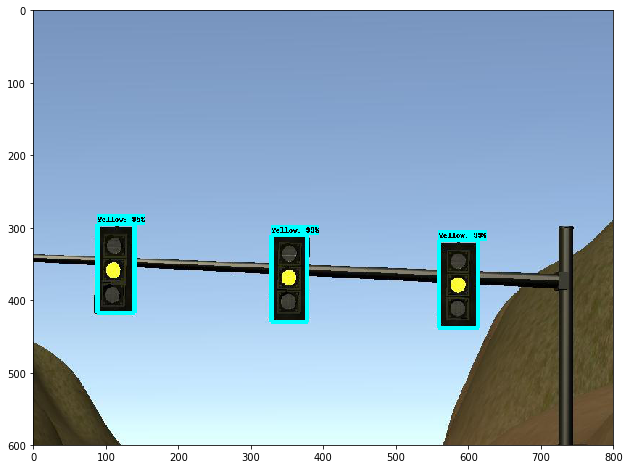

Yellow 0.9998909
Distance (metres) 0.0
Time in milliseconds 97.62096405029297 

Yellow 0.99771833
Distance (metres) 0.0
Time in milliseconds 97.62096405029297 

Yellow 0.9512609
Distance (metres) 0.0
Time in milliseconds 97.62096405029297 



In [ ]:
detection_graph = import_graph(sim_model_path)
image_paths = load_test_images("test_images_sim")
predict(detection_graph, image_paths)

## Detection: Real Test Pictures

test_images_real/*.jpg
Length of test images: 15


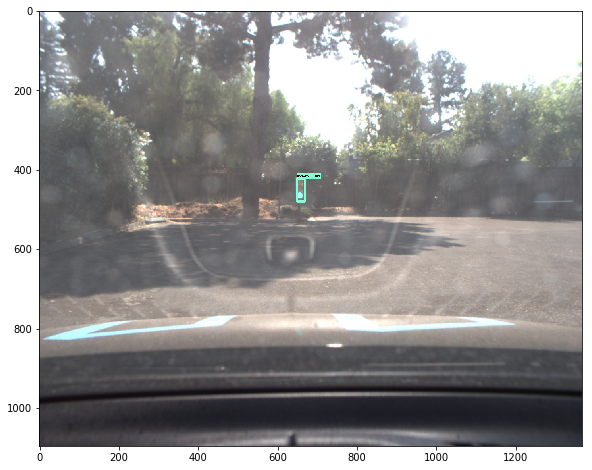

Green 0.9894192
Distance (metres) 0.0
Time in milliseconds 1047.7678775787354 



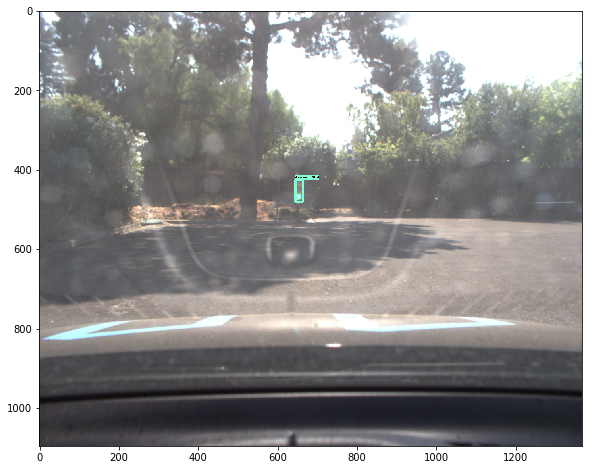

Green 0.9867361
Distance (metres) 0.0
Time in milliseconds 101.90725326538086 



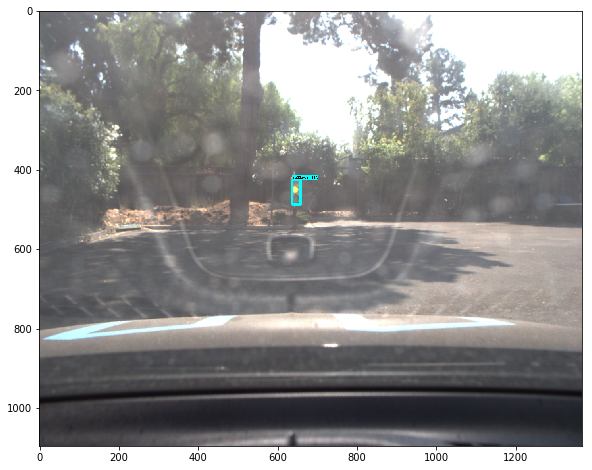

Yellow 0.96924365
Distance (metres) 0.0
Time in milliseconds 111.99831962585449 



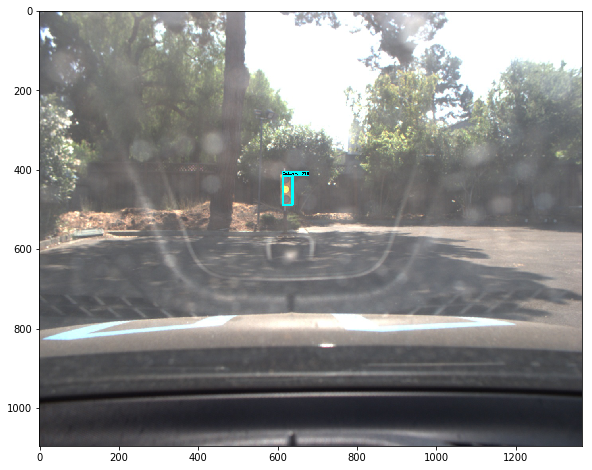

Yellow 0.99283904
Distance (metres) 0.0
Time in milliseconds 114.93420600891113 



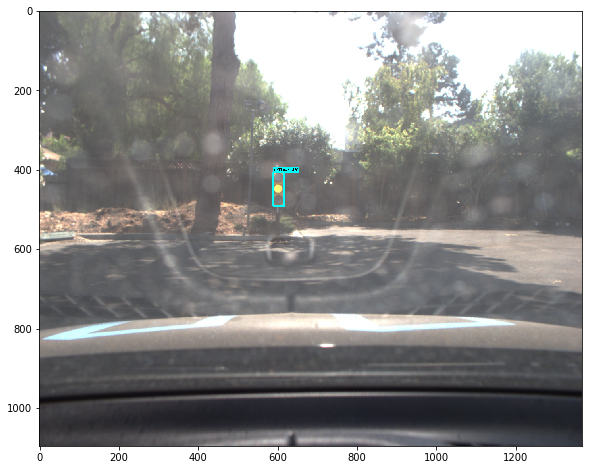

Yellow 0.9931589
Distance (metres) 0.0
Time in milliseconds 97.63503074645996 



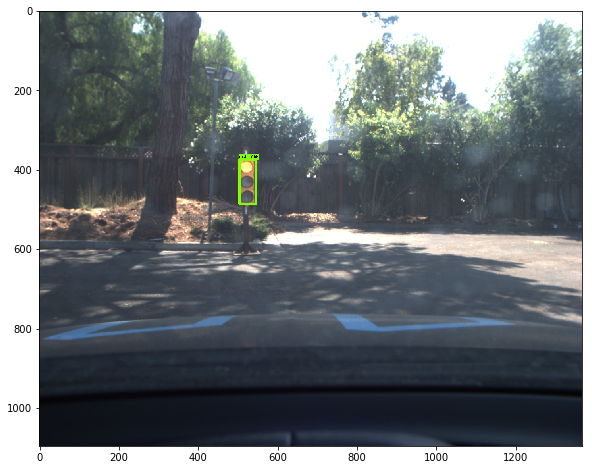

Red 0.99565613
Distance (metres) 0.0
Time in milliseconds 102.7991771697998 



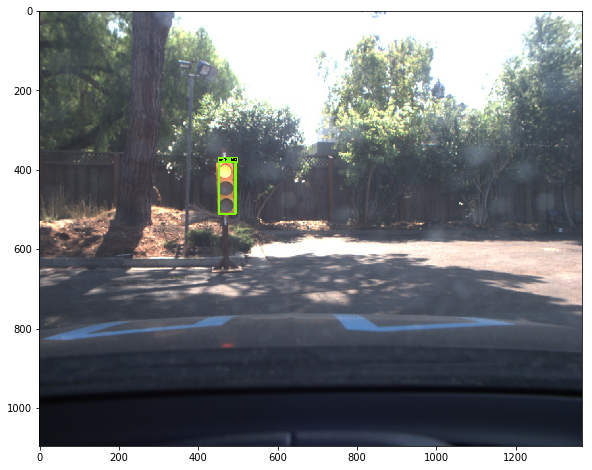

Red 0.999052
Distance (metres) 0.0
Time in milliseconds 99.94888305664062 



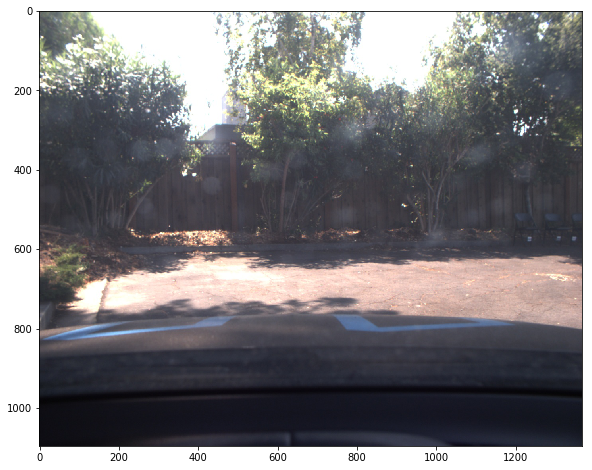

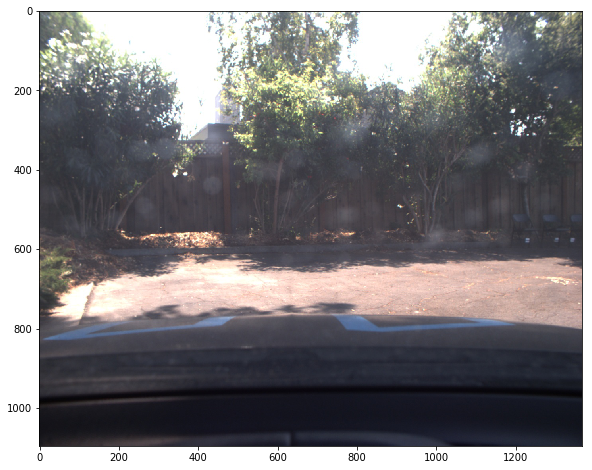

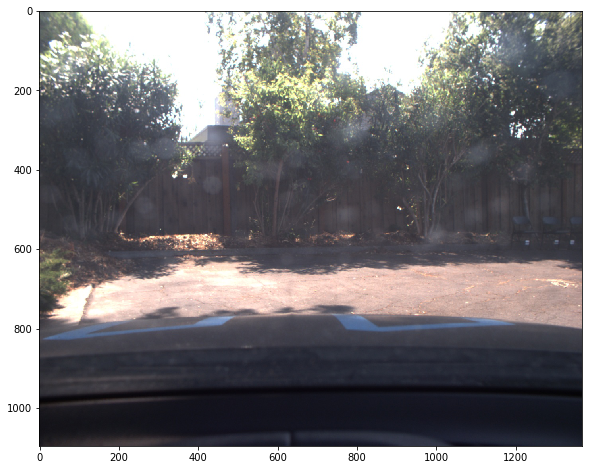

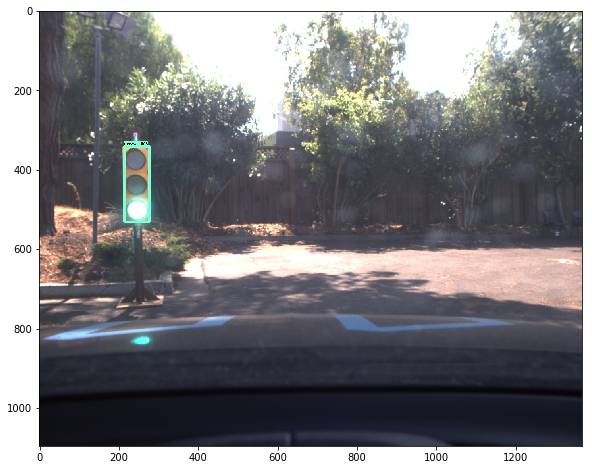

In [ ]:
detection_graph = import_graph(sim_model_path)
image_paths = load_test_images("test_images_real")
predict(detection_graph, image_paths)